# Cluster Analysis - April

## Data Preprocessing

For the purpose of working on the scale of one pc, only one BMS file is examined. Within this file, only one devices of multiple modules is also examined.

In [1]:
import pandas as pd
import glob
import timeit

bms_files = glob.glob('../../Bowland North Model/bms/bms-apr-2017.csv')
bms_meta_df = pd.read_csv('../../Bowland North Model/metadata/planonmeters.csv')

bms_frame_list = []

# timing the loop
start_time = timeit.default_timer()
for file_ in bms_files:
    df = pd.read_csv(file_, header=0)
    df = df[df['device_id'] == '{A69642A1-3855-479C-89F7-DCB47B48FCC0}'] 
    bms_frame_list.append(df)
elapsed = timeit.default_timer() - start_time

bms_df = pd.concat(bms_frame_list)

print("%d rows" % bms_df.shape[0])
print("%.2f seconds" % elapsed)
bms_df.head()

432495 rows
59.77 seconds


,param_name,param_type,param_value,timestamp,device_id,module_key
3277,S,1,67.313278,2017-04-01 01:00:00.170000000,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D11
3278,S,1,43.123947,2017-04-01 01:00:00.180000000,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D15
3279,S,101,1,2017-04-01 01:00:00.183000000,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D19
3280,S,1,100.0,2017-04-01 01:00:00.193000000,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D4
3281,S,1,38.220413,2017-04-01 01:00:00.207000000,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D8


## EDA
### Module Key Dimensions

In [2]:
print("%d unique modules/sensors" % len(bms_df['module_key'].unique()))
bms_df = bms_df[bms_df['param_value'] != "Invalid"]
mod_keys = bms_df['module_key'].unique()
bms_df['timestamp'] = pd.to_datetime(bms_df['timestamp'])

138 unique modules/sensors


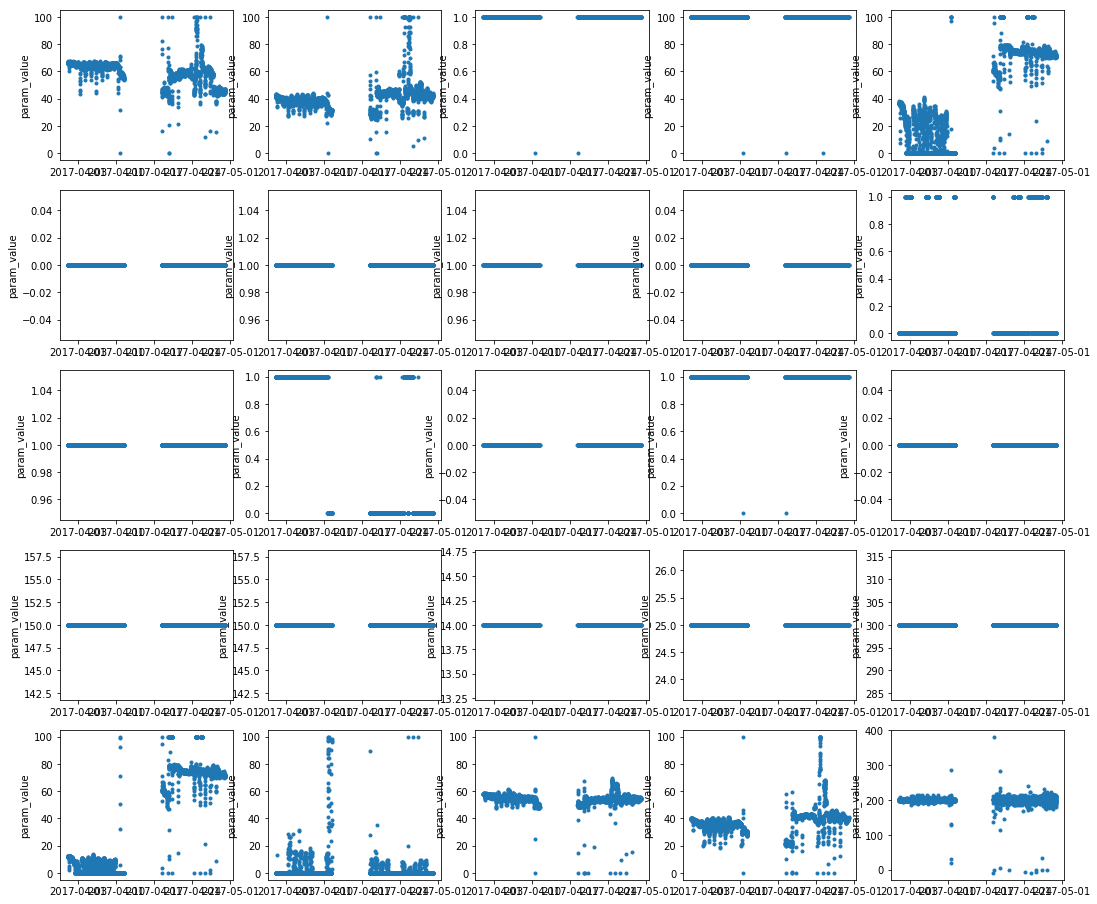

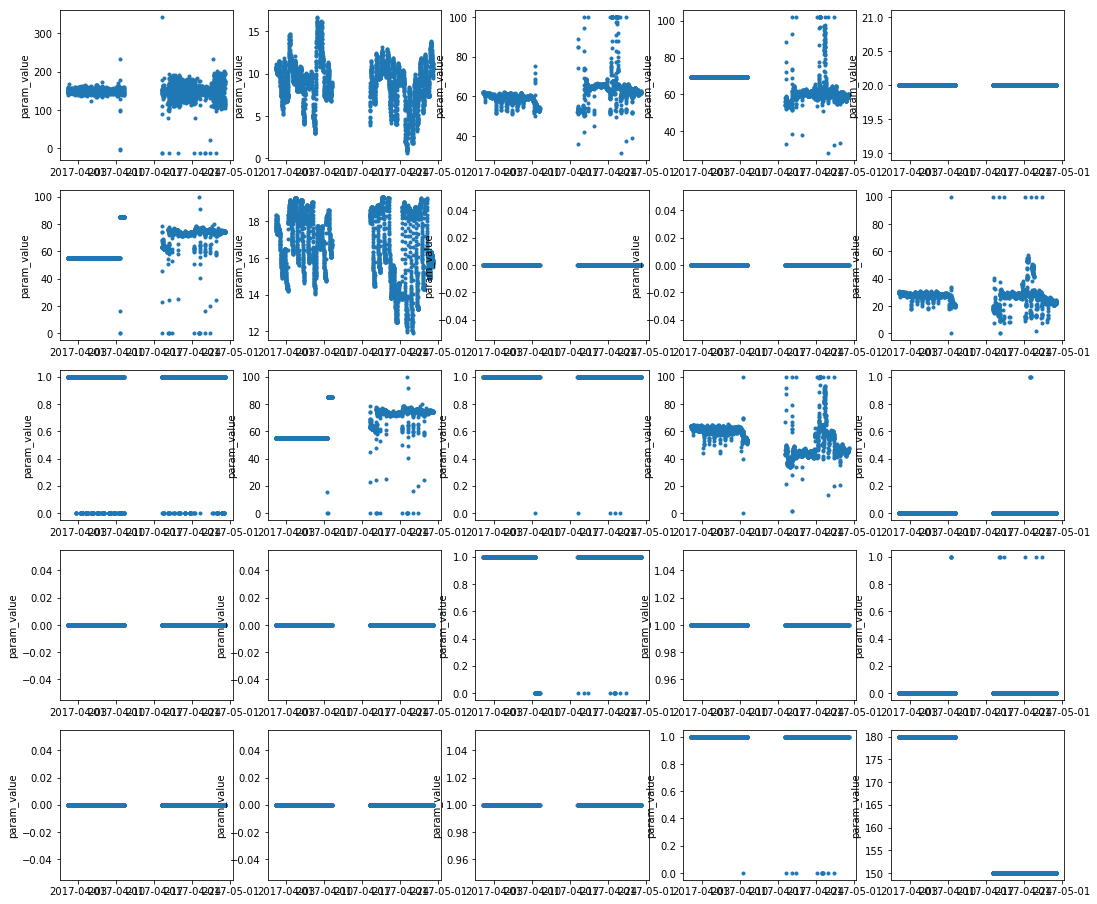

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

i = 1
plt.rcParams["figure.figsize"] = [18, 16]
plt.figure(1) 
for mkey in mod_keys[:25]:
    plt.subplot(5, 5, i)
    sensor = bms_df[bms_df.module_key == mkey]
    sensor = sensor[["timestamp", "param_value"]]
    sensor = sensor.sort_values("timestamp")
    plt.ylabel("param_value")
    plt.plot_date("timestamp", "param_value", ".", data=sensor)
    i += 1
# plt.savefig('plots/module_samples_raw.png')
i = 1
plt.figure(2) 
for mkey in mod_keys[25:50]:
    plt.subplot(5, 5, i)
    sensor = bms_df[bms_df.module_key == mkey]
    sensor = sensor[["timestamp", "param_value"]]
    sensor = sensor.sort_values("timestamp")
    plt.ylabel("param_value")
    plt.plot_date("timestamp", "param_value", ".", data=sensor)
    i += 1

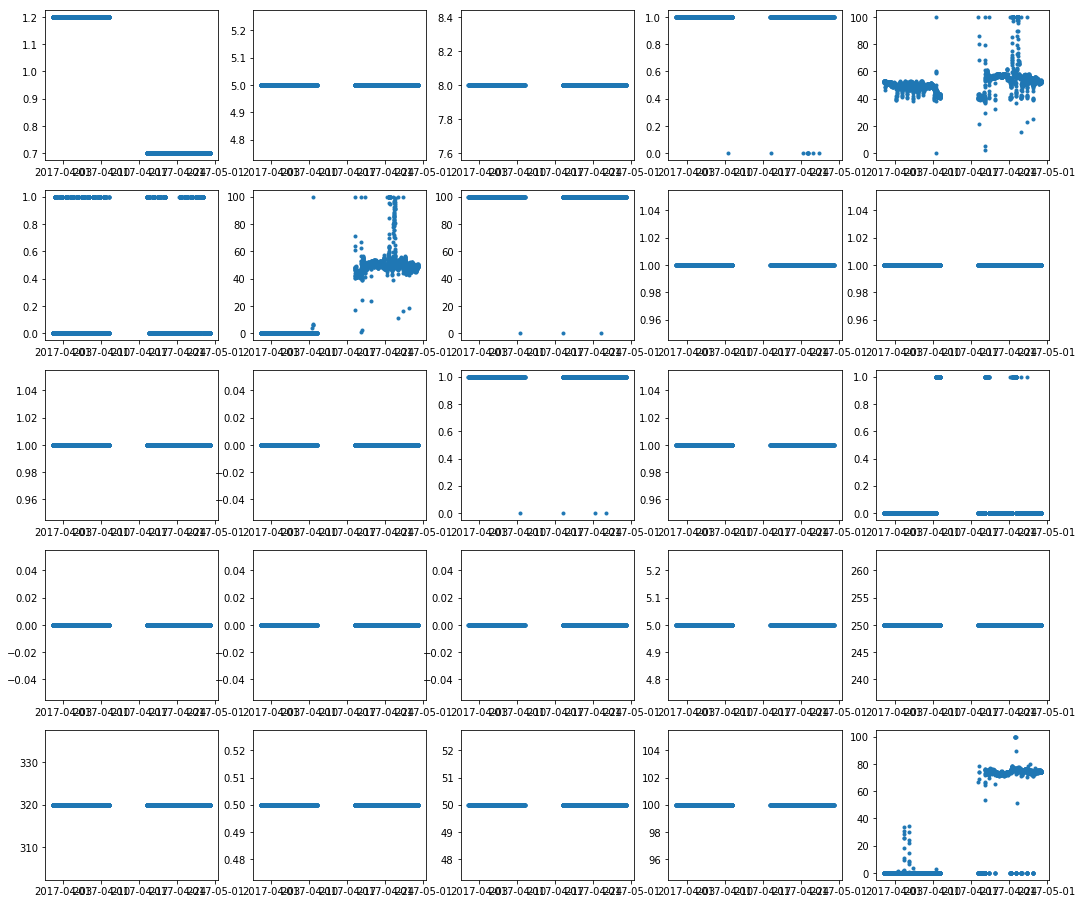

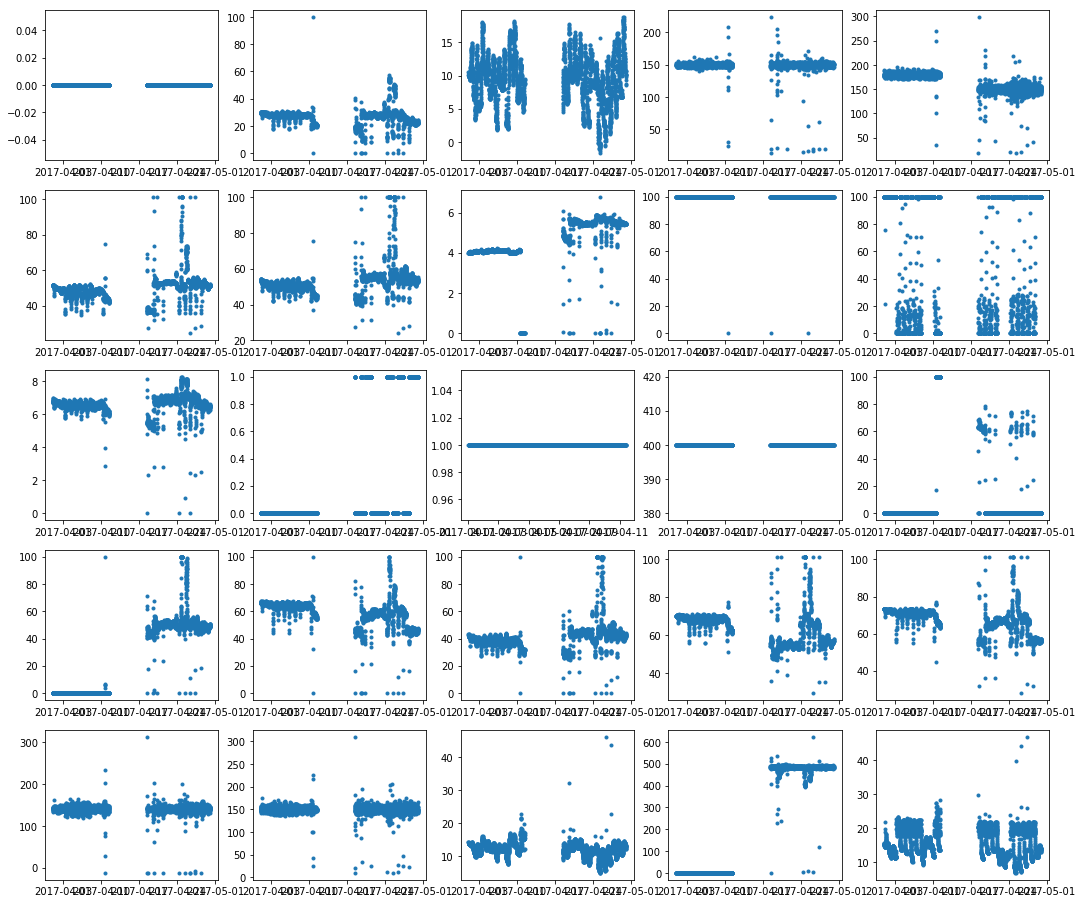

In [4]:
i = 1
plt.figure(1) 
for mkey in mod_keys[50:75]:
    plt.subplot(5, 5, i)
    sensor = bms_df[bms_df.module_key == mkey]
    sensor = sensor[["timestamp", "param_value"]]
    sensor = sensor.sort_values("timestamp")
    plt.plot_date("timestamp", "param_value", ".", data=sensor)
    i += 1

i = 1
plt.figure(2) 
for mkey in mod_keys[75:100]:
    plt.subplot(5, 5, i)
    sensor = bms_df[bms_df.module_key == mkey]
    sensor = sensor[["timestamp", "param_value"]]
    sensor = sensor.sort_values("timestamp")
    plt.plot_date("timestamp", "param_value", ".", data=sensor)
    i += 1

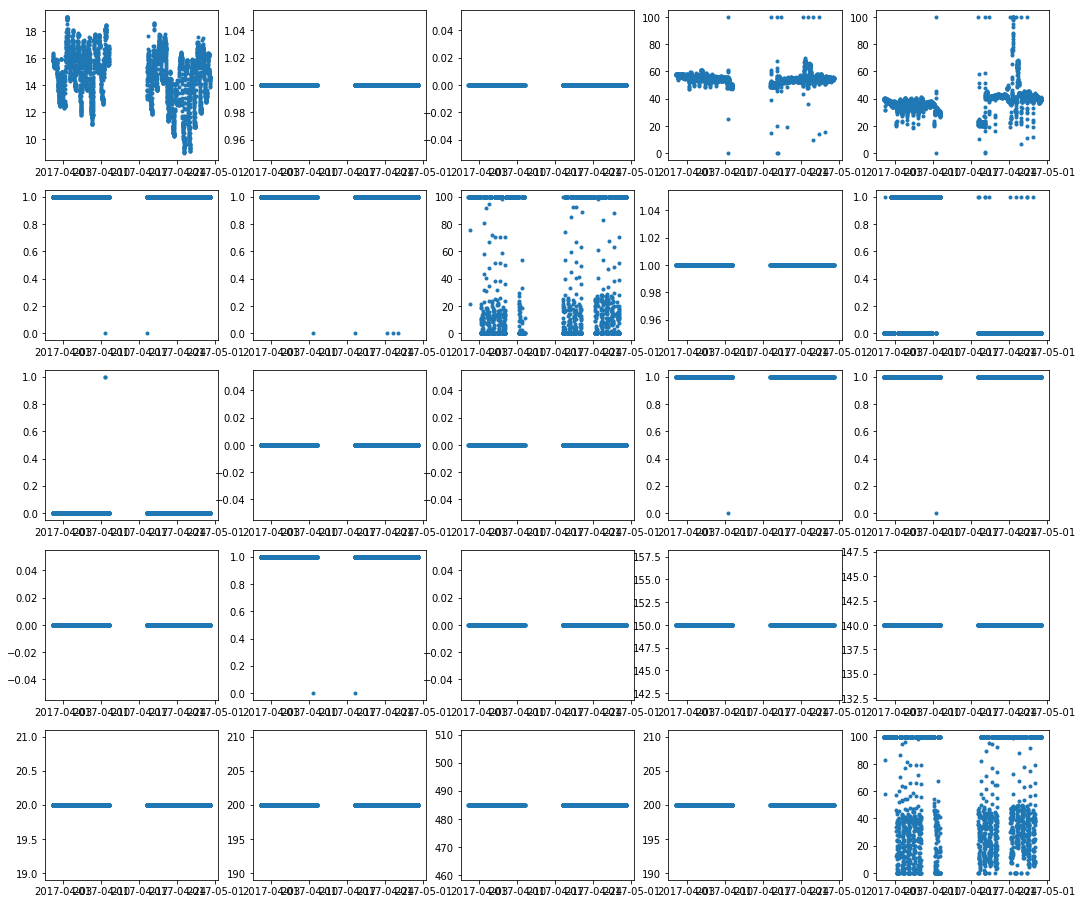

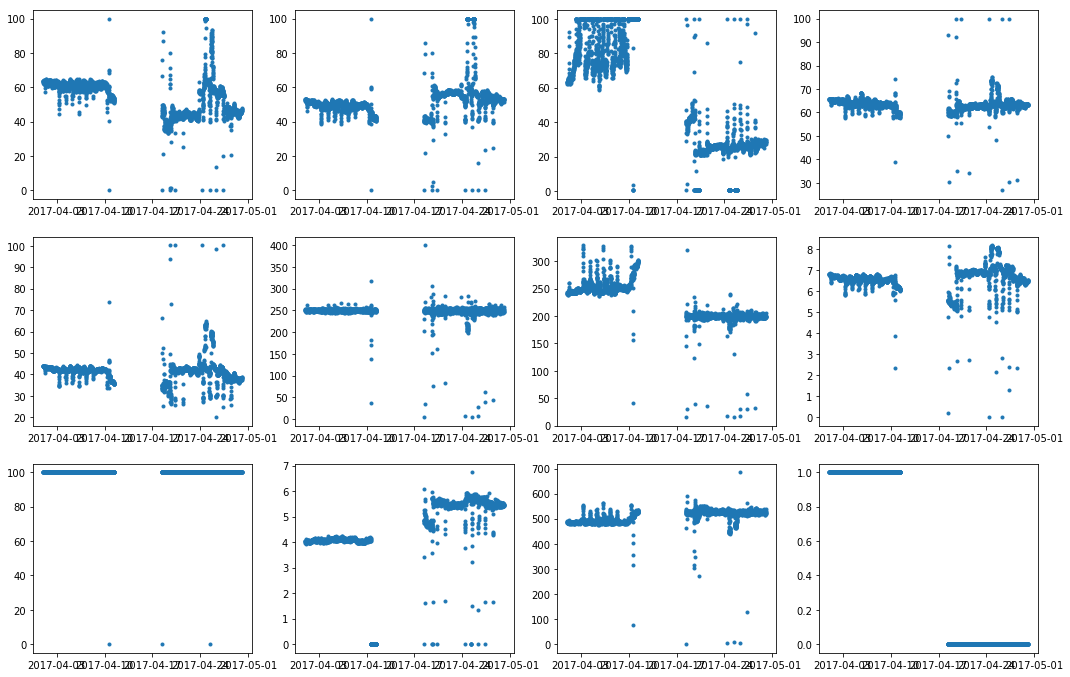

In [5]:
i = 1
plt.figure(1) 
for mkey in mod_keys[100:125]:
    plt.subplot(5, 5, i)
    sensor = bms_df[bms_df.module_key == mkey]
    sensor = sensor[["timestamp", "param_value"]]
    sensor = sensor.sort_values("timestamp")
    sensor = sensor[sensor['param_value'] != 'Invalid']
    plt.plot_date("timestamp", "param_value", ".", data=sensor)
    i += 1

i = 1
plt.figure(2) 
for mkey in mod_keys[125:]:
    plt.subplot(4, 4, i)
    sensor = bms_df[bms_df.module_key == mkey]
    sensor = sensor[["timestamp", "param_value"]]
    sensor = sensor.sort_values("timestamp")
    plt.plot_date("timestamp", "param_value", ".", data=sensor)
    i += 1

##### Comparing timescales of sensor readings

In [6]:
bms_df.sort_values('timestamp', inplace=True)
bms_df.groupby('module_key').head(2)

,param_name,param_type,param_value,timestamp,device_id,module_key
3478,S,101,1,2017-04-01 01:00:00.163,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D1
5418,S,1,57.995255,2017-04-01 01:00:00.167,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D10
3439,S,1,29.831327,2017-04-01 01:00:00.170,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D12
3277,S,1,67.313278,2017-04-01 01:00:00.170,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D11
3479,S,1,53.024948,2017-04-01 01:00:00.177,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D13
5419,S,1,39.363724,2017-04-01 01:00:00.177,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D14
3480,S,101,0,2017-04-01 01:00:00.180,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D17
3278,S,1,43.123947,2017-04-01 01:00:00.180,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D15
3440,S,101,1,2017-04-01 01:00:00.180,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D16
5420,S,101,1,2017-04-01 01:00:00.183,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D18


In [7]:
bms_df.groupby('module_key').tail(2)

,param_name,param_type,param_value,timestamp,device_id,module_key
15399184,D,101,1,2017-04-11 09:20:08.467,{A69642A1-3855-479C-89F7-DCB47B48FCC0},W7
15456926,D,101,1,2017-04-11 09:30:00.887,{A69642A1-3855-479C-89F7-DCB47B48FCC0},W7
42258077,S,101,1,2017-04-30 00:50:01.830,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D1
42277668,S,1,55.287003,2017-04-30 00:50:01.833,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D10
42257915,S,1,44.948406,2017-04-30 00:50:01.837,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D11
42258271,S,1,24.338047,2017-04-30 00:50:01.840,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D12
42258080,S,1,52.536896,2017-04-30 00:50:01.843,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D13
42277670,S,1,41.125671,2017-04-30 00:50:01.847,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D14
42257918,S,1,43.41114,2017-04-30 00:50:01.850,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D15
42258274,S,101,1,2017-04-30 00:50:01.853,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D16


### Descriptive Statistics

In [8]:
from scipy import stats
import numpy as np

st_df = bms_df[['module_key', 'param_value']]
st_df['param_value'] = pd.to_numeric(st_df['param_value'])
st_df.groupby('module_key')['param_value'].describe().transpose()

# it's really wide so probably good to examine in a spreadsheet:
# st_df.groupby('module_key')['param_value'].describe().transpose().to_csv("summary_stats.csv")
st_df.groupby('module_key')['param_value'].describe().transpose()

E:\Anaconda3\envs\dsci\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


module_key,D1,D10,D11,D12,D13,D14,D15,D16,D17,D18,...,S7,S8,S9,W1,W2,W3,W4,W5,W6,W7
count,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,...,3146.000000,3146.000000,3146.000000,3146.0,3146.0,3146.000000,3146.000000,3146.0,3146.0,1480.0
mean,0.996822,54.578359,59.240839,27.228709,52.441347,37.804273,41.262356,0.878297,0.364792,0.999364,...,14.700498,6.608046,507.609464,0.0,1.0,0.227273,0.470439,0.0,0.0,1.0
std,0.056290,4.322478,8.664037,6.535366,9.096062,8.705858,10.212792,0.326995,0.481448,0.025206,...,1.923493,0.561432,31.314467,0.0,0.0,0.419137,0.499205,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.966933,0.000000,-0.624999,0.0,1.0,0.000000,0.000000,0.0,0.0,1.0
25%,1.000000,53.402542,56.216948,25.710271,49.143011,34.291139,37.725029,1.000000,0.000000,1.000000,...,13.323482,6.467796,486.500031,0.0,1.0,0.000000,0.000000,0.0,0.0,1.0
50%,1.000000,54.596092,61.031109,27.788990,51.357464,38.164486,40.225601,1.000000,0.000000,1.000000,...,15.001141,6.657970,518.375000,0.0,1.0,0.000000,0.000000,0.0,0.0,1.0
75%,1.000000,55.874039,64.878720,28.796665,55.622492,41.210563,43.669880,1.000000,1.000000,1.000000,...,16.142818,6.857045,527.000000,0.0,1.0,0.000000,1.000000,0.0,0.0,1.0
max,1.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,...,19.071096,8.286720,684.875000,0.0,1.0,1.000000,1.000000,0.0,0.0,1.0


Removing the readings with no variation, as well as binary meters.
Sort the remaining by their means and observe patterns.

In [9]:
stats_df = st_df.groupby('module_key')['param_value'].describe()
stats_df = stats_df[stats_df['std'] != 0] # std == 0 gone
stats_df = stats_df[(stats_df['min'] != 0) & (stats_df['max'] != 1)]
stats_df = stats_df[stats_df['min'] != stats_df['max']]
print("%d sensors with variation remain" % stats_df.shape[0])
stats_df.sort_values('mean', inplace=True)

28 sensors with variation remain


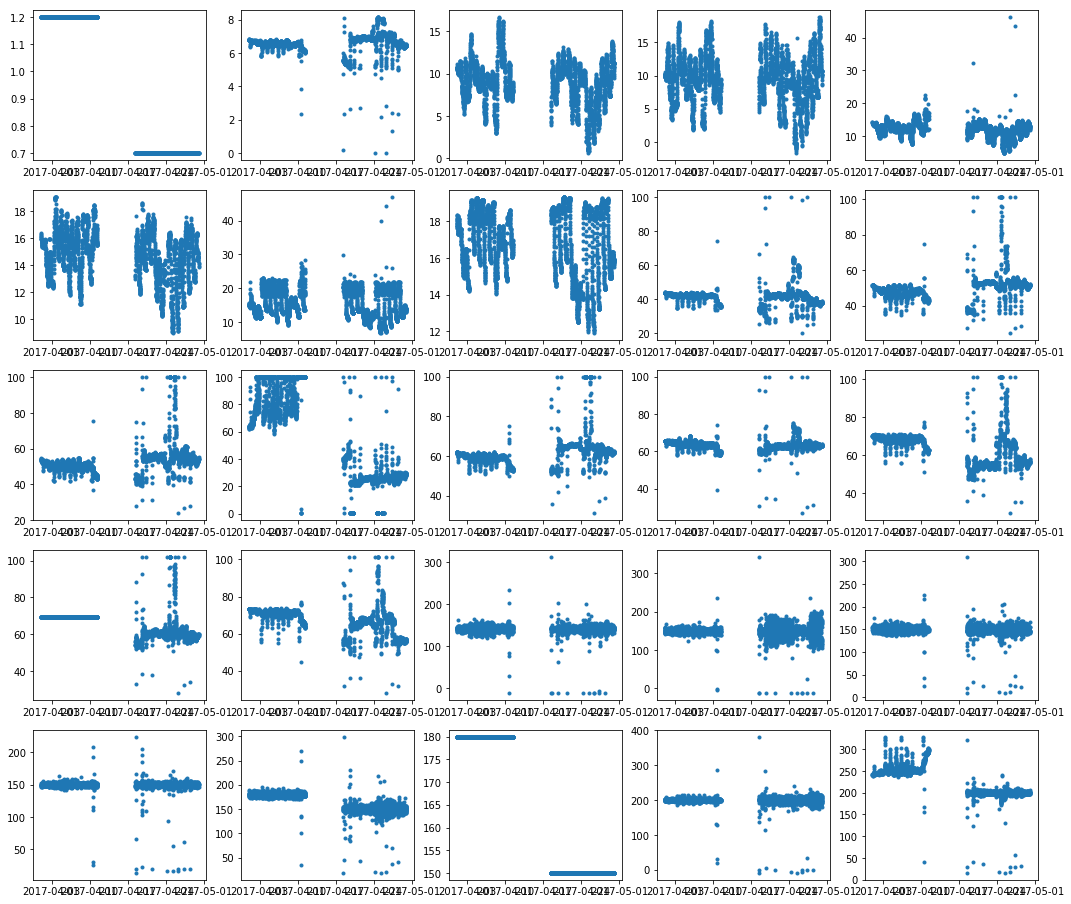

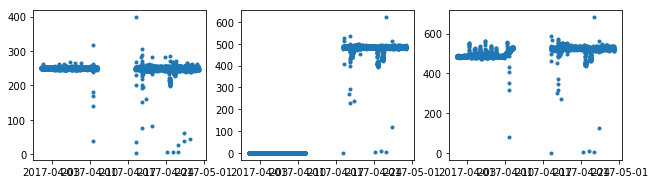

In [10]:
mod_keys = stats_df.index.values

i = 1
plt.figure(1) 
for mkey in mod_keys[:25]:
    plt.subplot(5, 5, i)
    sensor = bms_df[bms_df.module_key == mkey]
    sensor = sensor[["timestamp", "param_value"]]
    sensor = sensor.sort_values("timestamp")
    sensor = sensor[sensor['param_value'] != 'Invalid']
    plt.plot_date("timestamp", "param_value", ".", data=sensor)
    i += 1

i = 1
plt.figure(2) 
for mkey in mod_keys[25:]:
    plt.subplot(5, 5, i)
    sensor = bms_df[bms_df.module_key == mkey]
    sensor = sensor[["timestamp", "param_value"]]
    sensor = sensor.sort_values("timestamp")
    plt.plot_date("timestamp", "param_value", ".", data=sensor)
    i += 1

In [11]:
stats_df

,count,mean,std,min,25%,50%,75%,max
module_key,,,,,,,,
K16,3146.0,0.935219,0.249602,0.700000,0.700000,0.700000,1.200000,1.200000
S34,3146.0,6.608186,0.559449,0.000014,6.479566,6.666206,6.851646,8.175107
S2,3146.0,8.897446,2.677759,0.608990,7.409968,9.157972,10.652304,16.700586
S1,3146.0,9.273308,3.778944,-1.661635,6.827302,9.444530,11.802696,18.809643
S3,3146.0,12.130986,2.394154,4.792740,10.913757,12.334316,13.510859,46.330692
S7,3146.0,14.700498,1.923493,8.966933,13.323482,15.001141,16.142818,19.071096
S4,3146.0,15.649576,4.162450,6.731777,12.334316,14.905275,19.208358,47.002323
S6,3146.0,16.792212,1.843135,11.898560,15.349745,17.001259,18.452324,19.341263
S19,3146.0,41.572708,5.022860,20.030001,40.480000,42.110001,42.839996,100.200012


### Naive K-Means

Naive k-means clustering based on summary stats of the sensors of varying readings to provide some initial insight. First the elbow method is employed to observe the clusters that explain the most variance in the data set.
(Naive because it doesn't yet account for weekly perodicity, or other factors that might be of significance, that are not yet accounted for)

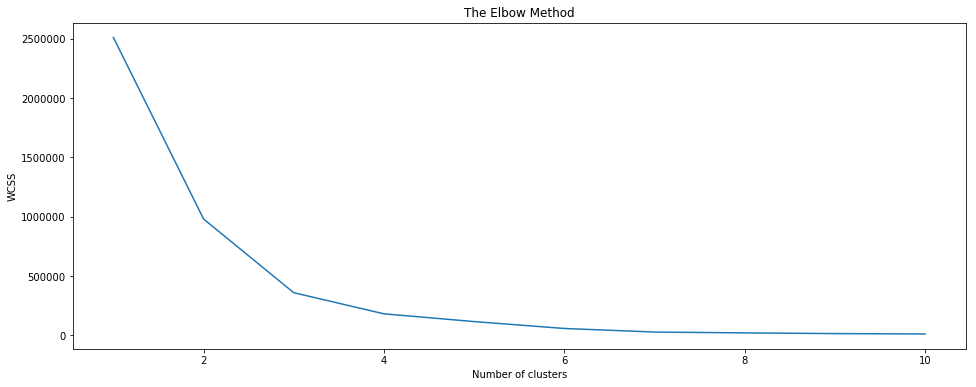

In [12]:
X = stats_df.iloc[:,:].values

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

RANDOM_SEED_KMEANS = 42

# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = RANDOM_SEED_KMEANS)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.rcParams["figure.figsize"] = [16, 6]
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

__Three__ clusters account for the most variance.

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
predicted_cluster_series = kmeans.fit_predict(X)
stats_df['cluster'] = predicted_cluster_series
stats_df.sort_index()['cluster']

module_key
K12    1
K16    0
S1     0
S11    0
S12    1
S13    0
S14    1
S15    0
S16    1
S17    0
S18    1
S19    0
S2     0
S20    1
S21    0
S22    1
S23    0
S24    1
S25    0
S26    1
S27    0
S3     0
S34    0
S36    2
S4     0
S6     0
S7     0
S9     2
Name: cluster, dtype: int32

#### Metadata Join
Arrange it by asset code (join with metadata file) to uniquely ID each sensor. A uniqe key is created by joining the _logger asset code_ and the _module key_. This makes it possible to refer to every sensor uniquely, since module keys alone are not unique.

In [14]:
#creating a key on which to join both DataFrames:

bms_meta_df = bms_meta_df[['Logger Channel', 'Logger Asset Code']]
bms_meta_df['key'] = bms_meta_df['Logger Asset Code'] + "/" + bms_meta_df['Logger Channel']
bms_meta_df.columns = ['device_id', 'asset_code', 'key']
bms_df['key'] = bms_df['device_id'] + "/" + bms_df['module_key']

bms_df = bms_df.merge(bms_meta_df, on='key')

bms_df.head()

,param_name,param_type,param_value,timestamp,device_id_x,module_key,key,device_id_y,asset_code
0,S,101,1,2017-04-01 01:00:00.163,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}/D1,D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}
1,S,101,1,2017-04-01 01:10:01.087,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}/D1,D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}
2,S,101,1,2017-04-01 01:20:00.847,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}/D1,D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}
3,S,101,1,2017-04-01 01:30:00.387,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}/D1,D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}
4,S,101,1,2017-04-01 01:39:59.477,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}/D1,D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}


## K-means

As a start, examining similarity as a function of euclidean distance via K-means clustering on the original dataset.

In [15]:
import numpy as np

# use only sensors with varying readings
bms_df = bms_df[bms_df.module_key.isin(mod_keys)]
bms_df['timestamp'] = pd.to_datetime(bms_df['timestamp'])
bms_df['hour'] = bms_df['timestamp'].dt.hour
bms_df['day_of_week'] = bms_df['timestamp'].dt.weekday
bms_df['week_of_year'] = bms_df['timestamp'].dt.weekofyear
bms_df['minute'] = bms_df['timestamp'].dt.minute
bms_df['day'] = bms_df['timestamp'].dt.day
bms_df.sort_values('timestamp')
bms_cluster_df = bms_df[['hour', 'minute', 'day_of_week', 'week_of_year', 'param_value' ]]

# remove Invalid reading
bms_cluster_df = bms_cluster_df[bms_cluster_df['param_value'] != 'Invalid']


#Prepare data for clustering
X = bms_cluster_df.iloc[:,:].values

bms_cluster_df.head()

,hour,minute,day_of_week,week_of_year,param_value
195065,1,0,5,13,180.0
195066,1,10,5,13,180.0
195067,1,20,5,13,180.0
195068,1,30,5,13,180.0
195069,1,40,5,13,180.0


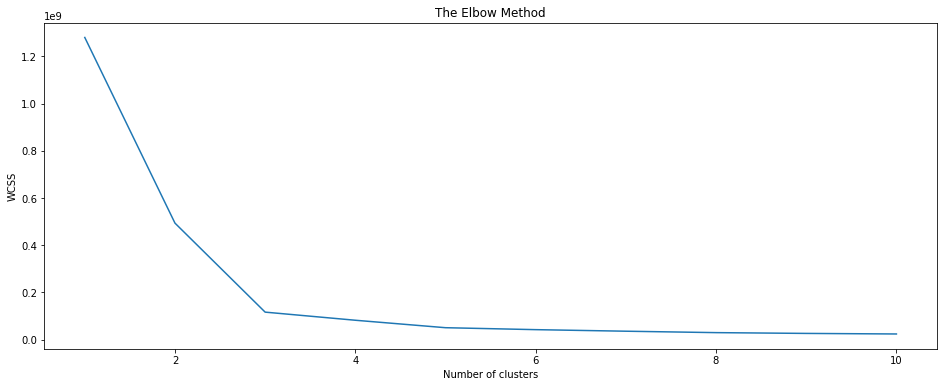

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

RANDOM_SEED_KMEANS = 42

# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = RANDOM_SEED_KMEANS)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.rcParams["figure.figsize"] = [16, 6]
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The most variance is also explained by 3 clusters, using euclidean distance as a similarity metric alone.

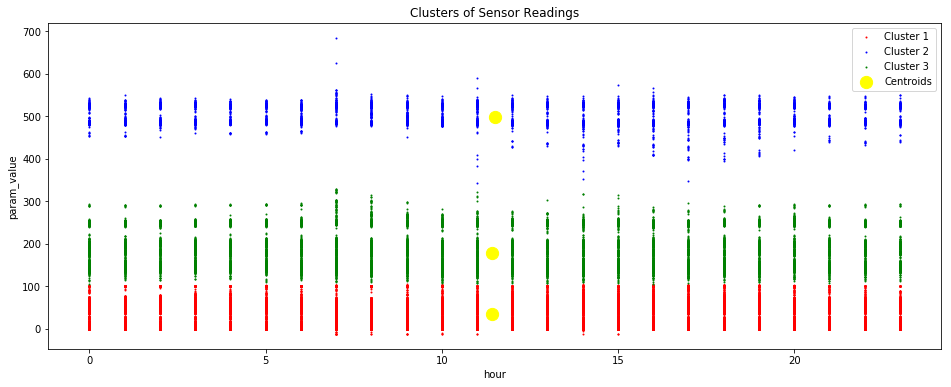

In [17]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 4], s = 1, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 4], s = 1, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 4], s = 1, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 4], s = 150, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Sensor Readings')
plt.xlabel('hour')
plt.ylabel('param_value')
plt.rcParams["figure.figsize"] = [16, 6]
plt.legend()
plt.show()

## K-means on weekly aggregated summary statistic dataframe

Comparing the clusters that came out of the k-means clustering for the summary stats data, and the actual bms data, the clustering is about the same. That is, a cluster with mean from 3 - 65, one from 135 - 250, and one from 485+
(extra notes in backup)

making the summary stats across weeks in a month will help to account for some seasonality averages.

In [18]:
bms_df['month_week'] = bms_df['week_of_year'] % 4

In [19]:
st_df2 = bms_df[['module_key', 'param_value', 'month_week']]
st_df2['param_value'] = pd.to_numeric(st_df2['param_value'])
stats_df2 = st_df2.groupby(['module_key', 'month_week'])['param_value'].describe()
stats_df2 = stats_df2[stats_df2['count'].values > 0.0]
stats_df2 = stats_df2.reset_index()
month_stats = []

for i in range(4):
    week_df = stats_df2[stats_df2['month_week'] == i]
    month_stats.append(week_df)

month_stats = [df.set_index('module_key') for df in month_stats]
month_df = pd.concat(month_stats, axis=1)
month_df = month_df.dropna(axis=1, how='any')

month_df = month_df[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']] # to remove month_week category
month_df

E:\Anaconda3\envs\dsci\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,count,count,count,count,mean,mean,mean,mean,std,std,...,50%,50%,75%,75%,75%,75%,max,max,max,max
module_key,,,,,,,,,,,,,,,,,,,,,
K12,803.0,1143.0,999.0,201.0,150.000000,157.349081,180.000000,180.000000,0.000000e+00,12.907719,...,180.000000,180.000000,150.000000,150.000000,180.000000,180.000000,150.000000,180.000000,180.000000,180.000000
K16,803.0,1143.0,999.0,201.0,0.700000,0.822485,1.200000,1.200000,1.110915e-16,0.215129,...,1.200000,1.200000,0.700000,0.700000,1.200000,1.200000,0.700000,1.200000,1.200000,1.200000
S1,803.0,1143.0,999.0,201.0,9.818116,8.636914,9.816668,8.015102,3.392586e+00,4.080990,...,10.120680,7.314448,12.160013,11.410515,12.247164,9.549600,17.746403,18.809643,18.182158,12.508617
S11,803.0,1143.0,999.0,201.0,26.946550,37.253062,87.230983,97.049209,1.271309e+01,24.393334,...,89.259995,100.100006,27.259999,62.025002,100.100006,100.100006,100.100006,100.109993,100.119995,100.109993
S12,803.0,1143.0,999.0,201.0,198.532535,198.444117,199.971347,198.082711,1.790863e+01,17.145775,...,199.750000,199.999985,204.124985,203.062507,201.624985,201.624985,381.874969,240.875000,215.624985,286.375000
S13,803.0,1143.0,999.0,201.0,54.871843,65.365600,68.334374,64.984179,5.163920e+00,9.409222,...,68.570000,63.880001,55.540001,69.380005,69.270004,67.649994,101.230003,101.269997,71.209999,77.310005
S14,803.0,1143.0,999.0,201.0,149.176837,149.024606,150.008884,148.723258,1.127582e+01,10.719636,...,150.125000,150.000000,151.375000,151.375000,151.250000,151.250000,224.125000,170.625000,162.750000,208.375000
S15,803.0,1143.0,999.0,201.0,62.210100,64.264586,63.859110,61.127363,3.444733e+00,3.468597,...,63.820000,61.329998,63.090004,65.160004,64.445004,62.690002,100.000000,100.000000,68.349998,74.349998
S16,803.0,1143.0,999.0,201.0,148.308375,148.978566,149.861612,148.447762,2.325341e+01,20.927650,...,149.750000,149.625000,162.999985,154.875015,153.000000,153.875000,343.375031,234.499985,172.625000,234.499985


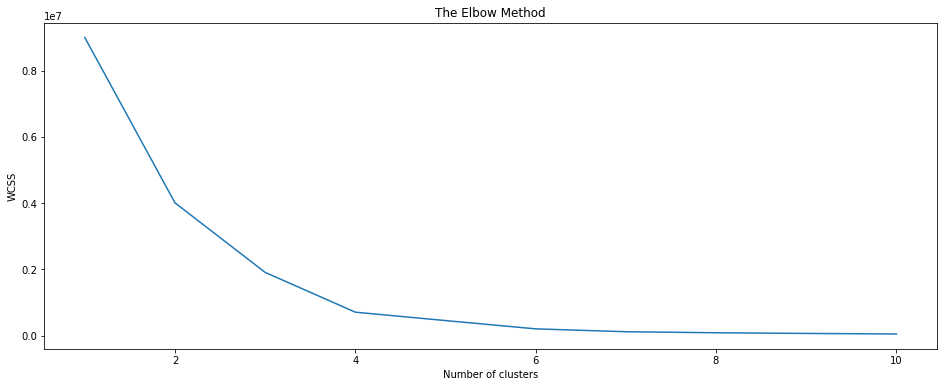

In [20]:
X = month_df.iloc[:,:].values

RANDOM_SEED_KMEANS = 42

# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = RANDOM_SEED_KMEANS)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.rcParams["figure.figsize"] = [16, 6]
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
predicted_cluster_series = kmeans.fit_predict(X)
stats_df['cluster2'] = predicted_cluster_series
stats_df.sort_index()[['cluster','cluster2']].to_csv('kmeans/apr_clust.csv')
stats_df.sort_index()[['cluster','cluster2']]

,cluster,cluster2
module_key,,
K12,1,1
K16,0,0
S1,0,1
S11,0,1
S12,1,0
S13,0,1
S14,1,1
S15,0,0
S16,1,1
